In [1]:
import keras
import numpy as np

In [2]:
from keras.datasets import fashion_mnist


def load_fashion_mnist():
    classes = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

    (trainX, trainy), (test_X, test_Y) = fashion_mnist.load_data()

    train_X = trainX[10000:, :, :]
    train_Y = trainy[10000:]

    valid_X = trainX[:10000, :, :]
    valid_Y = trainy[:10000]

    return classes, (train_X, train_Y), (valid_X, valid_Y), (test_X, test_Y)

def reshape_dataset(*data):
    return [x.reshape(x.shape[0], x.shape[1] * x.shape[2]) for x in data]

classes, (train_X, train_Y), (valid_X, valid_Y), (test_X, test_Y) = load_fashion_mnist()

train_X, valid_X, test_X = reshape_dataset(train_X, valid_X, test_X)

print(f'Train: X={train_X.shape}, y={train_Y.shape}')
print(f'Valid: X={valid_X.shape}, y={valid_Y.shape}')
print(f'Test: X={test_X.shape}, y={test_Y.shape}')

Train: X=(50000, 784), y=(50000,)
Valid: X=(10000, 784), y=(10000,)
Test: X=(10000, 784), y=(10000,)


In [3]:
import numpy as np

class_indices = np.unique(train_Y)
print(class_indices)
print(f'num_classes = {class_indices.shape[0]}')

max_value = np.max(train_X)
min_value = np.min(train_X)
print(max_value)
print(min_value)

[0 1 2 3 4 5 6 7 8 9]
num_classes = 10
255
0


In [4]:
# Thay đổi giá trị của các hyperparameter bên dưới và
# quan sát sự thay đổi của loss và quá trình training
EPOCHS = 300
LEARNING_RATE = 0.01
REG= 1e-5
BATCH_SIZE = 64

In [5]:
from sklearn.metrics import confusion_matrix


def normalize(X):
    return X / 255.


def reshape_x(X):
    '''reshape X with N matrix (28 x 28) to X with N vector (784,)
    Args:
        X: np.ndarray, shape NxHxW (with H = W = 28)
    Output:
        X: np.ndarray, shape NxD (with D = H * W)
    '''
    return X.reshape(X.shape[0], X.shape[1] * X.shape[2])


def add_one(X):
    '''Pad 1 as the 785th feature of train_X and test_X and valid_X
    Args:
        X: np.ndarray, shape N, D (with D=784)
    Output:
        X: np.ndarray, shape N, D + 1
    '''
    X = np.concatenate((X, np.ones(shape=(X.shape[0], 1))), axis=1)
    
    return X


def create_one_hot(y, num_classes):
    '''Example: y = [0, 2, 1, 0] with shape (4,), num_classes = 3
        --> y_onehot = [[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0]] shape: (4, 3)
        Args:
            y: np.ndarray, shape N
            num_classes: int, (usually =np.unique(y).shape[0])
        Outputs:
            y_onehot: np.ndarray, shape Nxnum_classes
    '''
    y_onehot = np.zeros(shape=(y.shape[0], num_classes), dtype=np.int32)
    y_onehot[np.arange(y.shape[0]), y] = 1
    
    return y_onehot

# def confusion_matrix(y_true, y_pred, num_classes):
#     '''
#     Args:
#         y_true:
#         y_pred:
#     Outputs:
#         m: 
#     '''
#     pass
    




In [10]:
from neural_network import NeuralNetwork
from trainer import batch_train, minibatch_train
import numpy as np


def mnist_classification(use_batch_train=True):
    # Load data from file
    # Make sure that fashion-mnist/*.gz is in data/
    classes, (train_X, train_Y), (valid_X, valid_Y), (test_X, test_Y) = load_fashion_mnist()
    train_X, valid_X, test_X = normalize(train_X), normalize(valid_X), normalize(test_X)
    train_X, valid_X, test_X = reshape_x(train_X), reshape_x(valid_X), reshape_x(test_X)
    
    num_classes = np.unique(train_Y).shape[0]

    train_X = add_one(train_X)
    valid_X = add_one(valid_X)
    test_X = add_one(test_X)

    train_Y = create_one_hot(train_Y, num_classes)
    valid_Y = create_one_hot(valid_Y, num_classes)

    # Create NN classifier
    model = NeuralNetwork(learning_rate=LEARNING_RATE, num_classes = 10, reg=REG)
    model.add_layers(128, 'relu')
    model.add_layers(256, 'relu')
    model.add_layers(100, 'relu')
    model.add_layers(64, 'relu')
    model.add_layers(num_classes, 'softmax')

    if use_batch_train:
        #Batch training - train all dataset
        batch_train(train_X, train_Y, EPOCHS, model)
    else:
        #Minibatch training - training dataset using Minibatch approach
        minibatch_train(train_X, train_Y, EPOCHS, BATCH_SIZE, num_classes, model)

    metrics = confusion_matrix(test_Y, model.predict(test_X))
    print("Confusion metrix: ")
    print(metrics)

    print("Accuracy: ")
    print(metrics.trace() / test_Y.shape[0])

In [11]:
mnist_classification(use_batch_train=True)

Loss epoch 0: 0.0077
Loss epoch 1: 0.0077
Loss epoch 2: 0.0077
Loss epoch 3: 0.0077
Loss epoch 4: 0.0077
Loss epoch 5: 0.0077
Loss epoch 6: 0.0077
Loss epoch 7: 0.0077
Loss epoch 8: 0.0076
Loss epoch 9: 0.0076
Loss epoch 10: 0.0076
Loss epoch 11: 0.0076
Loss epoch 12: 0.0076
Loss epoch 13: 0.0076
Loss epoch 14: 0.0076
Loss epoch 15: 0.0076
Loss epoch 16: 0.0076
Loss epoch 17: 0.0076
Loss epoch 18: 0.0076
Loss epoch 19: 0.0075
Loss epoch 20: 0.0075
Loss epoch 21: 0.0075
Loss epoch 22: 0.0075
Loss epoch 23: 0.0075
Loss epoch 24: 0.0075
Loss epoch 25: 0.0075
Loss epoch 26: 0.0075
Loss epoch 27: 0.0075
Loss epoch 28: 0.0075
Loss epoch 29: 0.0075
Loss epoch 30: 0.0075
Loss epoch 31: 0.0074
Loss epoch 32: 0.0074
Loss epoch 33: 0.0074
Loss epoch 34: 0.0074
Loss epoch 35: 0.0074
Loss epoch 36: 0.0074
Loss epoch 37: 0.0074
Loss epoch 38: 0.0074
Loss epoch 39: 0.0074
Loss epoch 40: 0.0074
Loss epoch 41: 0.0074
Loss epoch 42: 0.0073
Loss epoch 43: 0.0073
Loss epoch 44: 0.0073
Loss epoch 45: 0.007

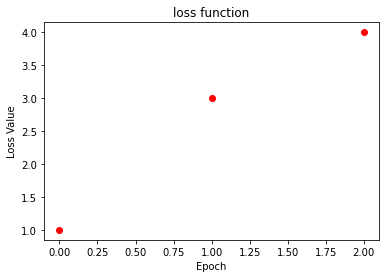

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plot_loss(losses=[1, 3, 4], title='loss function', color='ro')

In [12]:
mnist_classification(use_batch_train=False)

Loss epoch 0: 0.8648
Loss epoch 1: 0.3170
Loss epoch 2: 0.3062
Loss epoch 3: 0.2085
Loss epoch 4: 0.1717
Loss epoch 5: 0.1973
Loss epoch 6: 0.1849
Loss epoch 7: 0.1549
Loss epoch 8: 0.1299
Loss epoch 9: 0.1133
Loss epoch 10: 0.1276
Loss epoch 11: 0.1155
Loss epoch 12: 0.1256
Loss epoch 13: 0.1159
Loss epoch 14: 0.0929
Loss epoch 15: 0.0872
Loss epoch 16: 0.0998
Loss epoch 17: 0.1077
Loss epoch 18: 0.0904
Loss epoch 19: 0.0801
Loss epoch 20: 0.0847
Loss epoch 21: 0.0856
Loss epoch 22: 0.0932
Loss epoch 23: 0.0553
Loss epoch 24: 0.0697
Loss epoch 25: 0.0712
Loss epoch 26: 0.0792
Loss epoch 27: 0.0765
Loss epoch 28: 0.0846
Loss epoch 29: 0.0694
Loss epoch 30: 0.0736
Loss epoch 31: 0.0741
Loss epoch 32: 0.0745
Loss epoch 33: 0.0806
Loss epoch 34: 0.0501
Loss epoch 35: 0.0682
Loss epoch 36: 0.0655
Loss epoch 37: 0.0644
Loss epoch 38: 0.0572
Loss epoch 39: 0.0612
Loss epoch 40: 0.0795
Loss epoch 41: 0.0500
Loss epoch 42: 0.0665
Loss epoch 43: 0.0573
Loss epoch 44: 0.0585
Loss epoch 45: 0.066